<a href="https://colab.research.google.com/github/mmmmiikkkka/my-macro-project2/blob/main/%E5%BE%8C%E5%8D%8A%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 各種パラメータ
beta = 0.985 ** 20  # 割引因子（20年単位）
gamma = 2.0         # 相対的リスク回避度
r = 1.025**20 - 1   # 20年の利子率
income_young = [0.8027, 1.0, 1.2457]  # 若年期の生産性ごとの労働所得
P = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1360],
    [0.0021, 0.2528, 0.7451]
])  # 若年期→中年期への労働所得の遷移確率行列
income_middle = P @ income_young #中年期の期待所得
pop_ratio = [1/3, 1/3, 1/3]  # 各タイプの人口比
asset_grid = np.linspace(0, 5, 100)  # 資産グリッド

# 効用関数
def utility(c):
    return (c**(1 - gamma)) / (1 - gamma) if c > 0 else -1e10

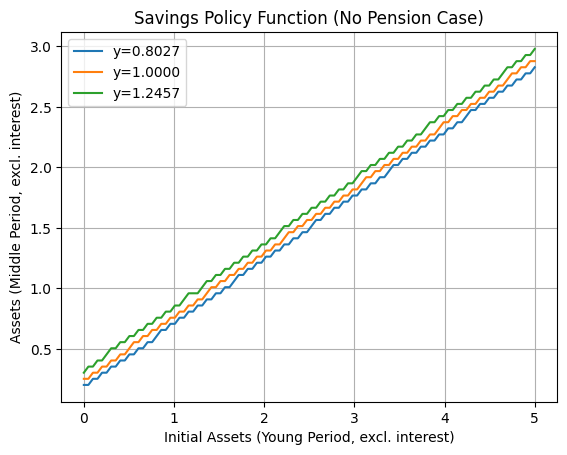

In [31]:
# 年金がない場合の各生産性タイプに対する政策関数の計算
def solve_lifecycle(y_young, y_middle, pension=0.0):
    savings_policy = []
    for a1 in asset_grid:  # 若年期の初期資産（利子を除く）
        max_val = -1e10
        best_s = 0
        for s1 in asset_grid:  # 若年期末の貯蓄（時期に持ち越す資産）
            c1 = y_young + a1- s1  # 若年期消費
            for s2 in asset_grid:  # 中年期末の貯蓄（老年期用）
                c2 = y_middle + (1 + r) * s1 - s2  # 中年期消費
                c3 = pension + (1 + r) * s2  # 老年期消費

                u = utility(c1) + beta * utility(c2) + beta**2 * utility(c3)
                if u > max_val:
                    max_val = u
                    best_s = s1
        savings_policy.append(best_s)
    return savings_policy

# 各生産性タイプに対して貯蓄政策関数を描画
for i, y_young in enumerate(income_young):
    y_middle = income_middle[i]  # その生産性に応じた期待中年期所得
    policy = solve_lifecycle(y_young, y_middle)
    plt.plot(asset_grid, policy, label=f"y={y_young:.4f}")

plt.xlabel("Initial Assets (Young Period, excl. interest)")
plt.ylabel("Assets (Middle Period, excl. interest)")
plt.title("Savings Policy Function (No Pension Case)")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# 中年期に定率所得税を課した場合の税収
tax_rate = 0.30  # 税率

# 各タイプの税額 = 税率 × 期待所得 × 人口比率
total_tax = 0
for i in range(3):
    individual_tax = tax_rate * income_middle[i]
    weighted_tax = individual_tax * pop_ratio[i]
    total_tax += weighted_tax

print(f"政府の中年期における総税収: {total_tax:.4f}")

# 1人当たりの年金額を計算する
pension_fund = total_tax * (1 + r)
pension_per_person = pension_fund / sum(pop_ratio)

print(f"一人当たりの年金額: {pension_per_person:.4f}")


政府の中年期における総税収: 0.3043
一人当たりの年金額: 0.4986


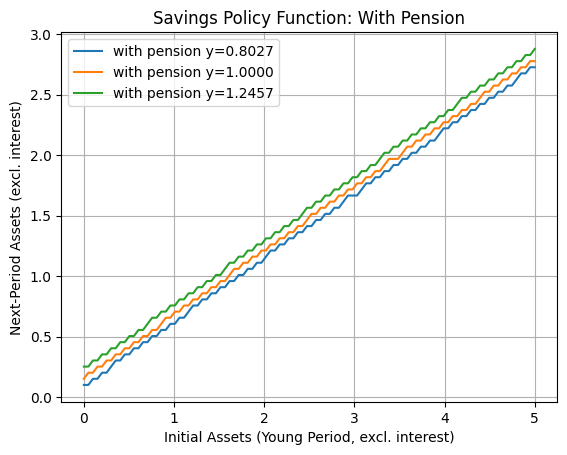

In [33]:
# 年金導入後の貯蓄政策関数の描画（問1のコードを利用）
for i, y_young in enumerate(income_young):
    y_middle = income_middle[i]
    policy_with_pension = solve_lifecycle(y_young, y_middle, pension_per_person)
    plt.plot(asset_grid, policy_with_pension, label=f"with pension y={y_young:.4f}")

plt.xlabel("Initial Assets (Young Period, excl. interest)")
plt.ylabel("Next-Period Assets (excl. interest)")
plt.title("Savings Policy Function: With Pension")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# 初期資産ゼロの期待生涯効用
def expected_lifetime_utility(y_young, y_middle, pension=0.0):
    a1 = 0.0
    max_val = -1e10
    for s1 in asset_grid:
        c1 = y_young + a1 - s1
        for s2 in asset_grid:
            c2 = y_middle + (1 + r) * s1 - s2
            c3 = pension + (1 + r) * s2
            u = utility(c1) + beta * utility(c2) + beta**2 * utility(c3)
            if u > max_val:
                max_val = u
    return max_val

# 経済全体の平均期待効用を計算
def compute_aggregate_utility(pension=0.0):
    total_utility = 0.0
    for i in range(3):
        u = expected_lifetime_utility(income_young[i], income_middle[i], pension)
        total_utility += pop_ratio[i] * u
    return total_utility

# 実行：年金なし／ありの比較
agg_u_no_pension = compute_aggregate_utility(pension=0.0)
agg_u_with_pension = compute_aggregate_utility(pension=pension_per_person)

print(f"経済全体の平均期待生涯効用（年金なし）: {agg_u_no_pension:.4f}")
print(f"経済全体の平均期待生涯効用（年金あり）: {agg_u_with_pension:.4f}")

if agg_u_with_pension > agg_u_no_pension:
    print("✅ 年金導入により平均期待効用が増加 → 制度は維持すべき。")
else:
    print("⚠️ 年金導入により平均期待効用が減少 → 制度の見直しが必要。")

経済全体の平均期待生涯効用（年金なし）: -2.8316
経済全体の平均期待生涯効用（年金あり）: -2.5286
✅ 年金導入により平均期待効用が増加 → 制度は維持すべき。
